# Experiment 1

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & = 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, no confounding features, and normally distributed noise. If the
world was all like this, we would have no need for anything other than 
linear regression.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = 0

In [5]:
SIGMA = np.arange(0.0, 101.0, 20.0)

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA[1])

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.8633122638379599 0.7828312281691534


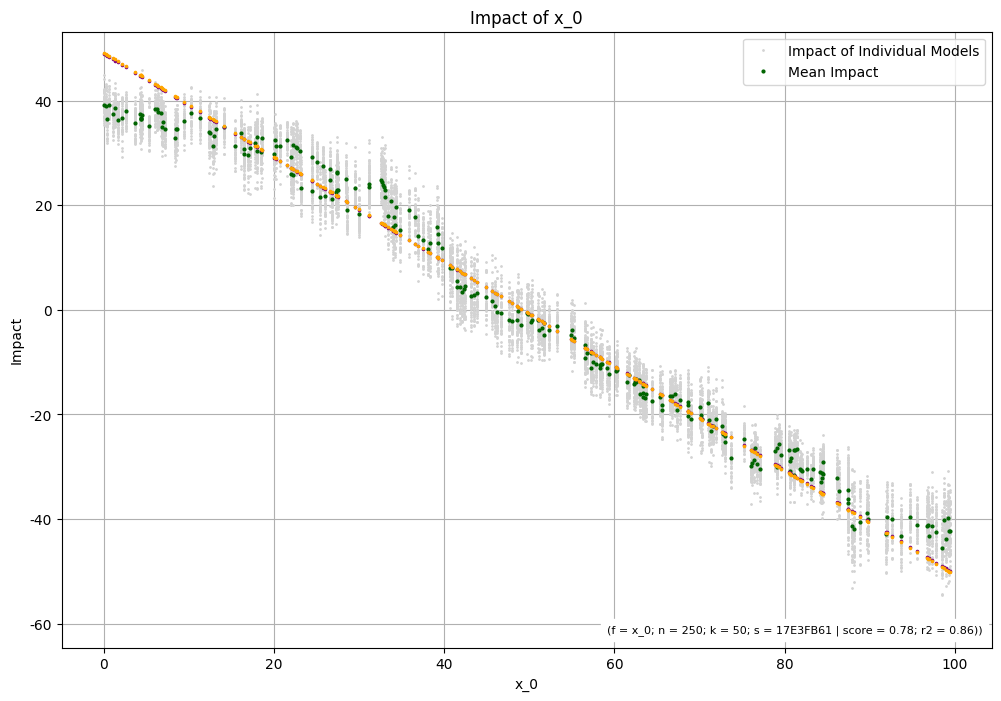

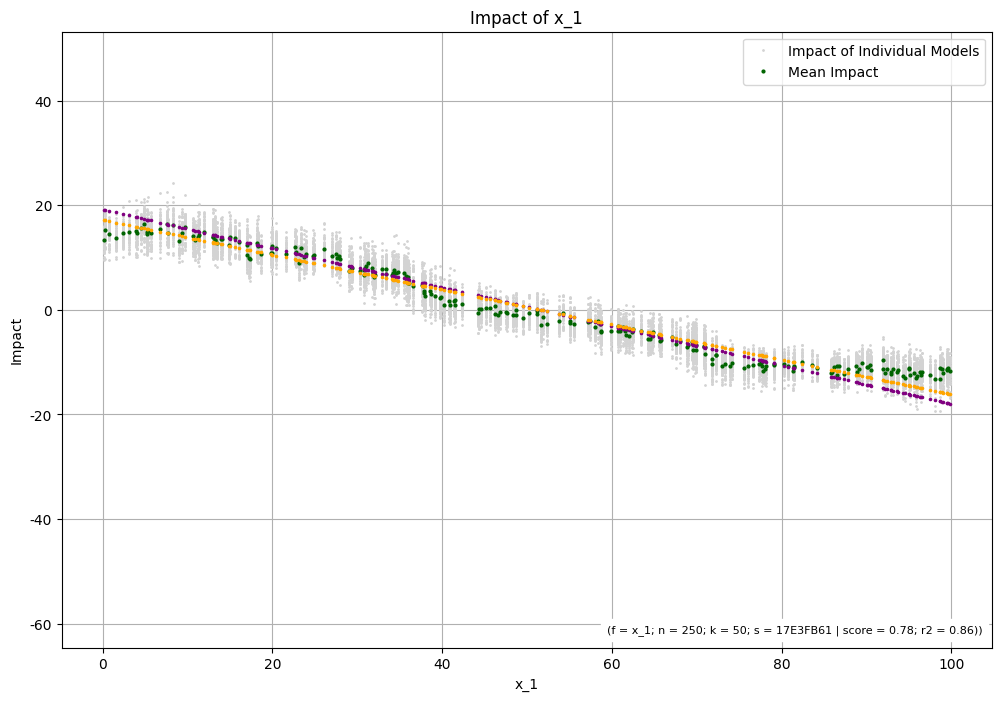

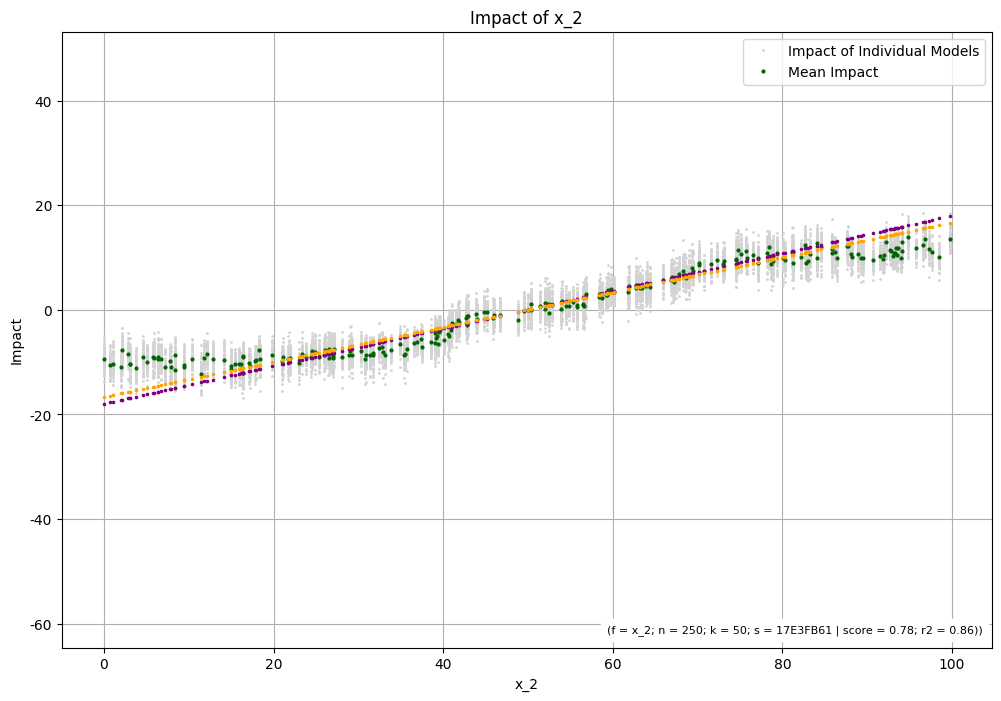

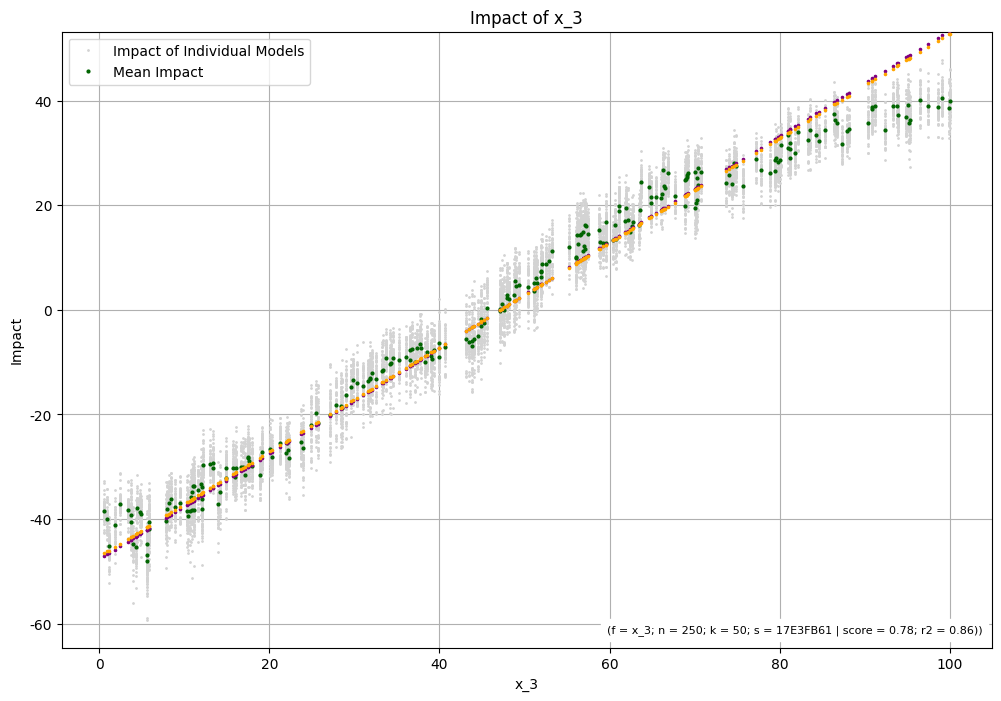

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,mu_x_i
0,RMSE,4.073426,1.774569,2.330473,4.025519,3.050997
0,MAE,3.149965,1.462047,1.687006,3.053973,2.338248
0,MED_AE,2.355476,1.382148,1.190200,2.473560,1.850346
0,LR_RMSE,0.126937,1.125966,0.725417,0.329445,0.576941
0,LR_MAE,0.109994,0.982545,0.630470,0.282555,0.501391
0,LR_MED_AE,0.105916,0.930568,0.604187,0.273443,0.478528


In [10]:
scenario.linreg_r2(N), scenario.model_r2(N)

(0.8337396676249424, 0.8633122638379599)

## A Multi-Scenario Experiment

In [11]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA)

In [12]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.9981542922284177 0.9816624901437363
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.8633122638379599 0.7828312281691534
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.664298554879698 0.4856909756189787
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.4817958867647548 0.2923706386525296
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
TTT <class 'xgboost.sklearn.XGBRegressor'> <class 'xgboost.sklearn.XGBRegressor'>
SSS None None 0.3507014534891756 0.173271292932443
Fitting 5 fo

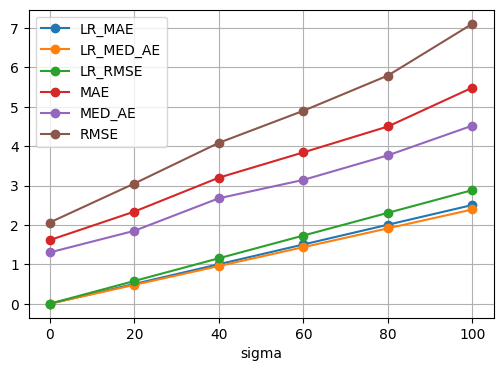

In [29]:
ax = None

for name, df_group in df_model_errors.groupby("metric"):
    ax = df_group.plot("sigma", "mu_x_i", marker="o", ax=ax, label=name, figsize=(6, 4))

ax.grid()

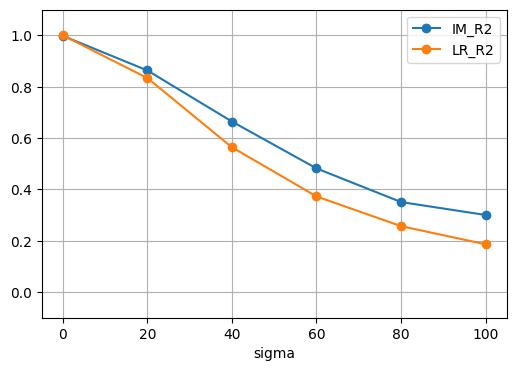

In [30]:
df_r2 = df_model_errors[df_model_errors["metric"] == "RMSE"][
    ["sigma", "IM_R2", "LR_R2"]
]

ax = df_r2.plot("sigma", "IM_R2", marker="o", figsize=(6, 4))
ax = df_r2.plot("sigma", "LR_R2", marker="o", ax=ax)

ax.set_ylim(-0.1, 1.1)
ax.grid()